In [1]:
"""Computation of Betti-0 curves"""

"""Starting from connectivity matrix CX using an algorith we create the Dx matrices. 
In the Dx matrices all the information of the different clusters are stored.
We also create a barcode visualisation to see how the connencted components are merging with the increasment
of the filtration value and we plot the results."""

"""
__author__ = "Giulia Moreni"
__contact__ = "giulia.moreni1995@gmail.com"
__date__ = "2020/04/15"   ### Date it was created
__status__ = "Concluded" ### 


####################
 Review History   #
####################

Reviewed by Name Date ### 

Fernando 03/11/2020
"""

'\n__author__ = "Giulia Moreni"\n__contact__ = "giulia.moreni1995@gmail.com"\n__date__ = "2020/04/15"   ### Date it was created\n__status__ = "Concluded" ### \n\n\n####################\n Review History   #\n####################\n\nReviewed by Name Date ### \n\nFernando 03/11/2020\n'

In [2]:
####################
# Libraries        #
####################
import pandas as pd #
import matplotlib.pyplot as plt #
import numpy as np # version 1.0.1
import scipy as sio #
import glob #
from random import gauss #
import math as m #
import seaborn as sns #

In [12]:
def from_cx_to_dx(matrix,verbose=False):
    """Function to convert a matrix Cx to a Dx matrix (definition of distance between points based on clusters, not euclidean distance)
    
    Parameters
    ----------
    Argument1: Matrix NxN array type (i.e., the connectivity matrix you want to convert into Dx matrix - Notice that in the Dx matrix the info of the barcodes are also stored) 

    
    Returns
    -------
    out: Dx matrix (NxN), 
    a_values (list which contains the filtration values where a change in the clustering of the network occurs),
    connected_comp (list containing the number of connected components at each filtration step)
        
    """
    
    a_values=[] # initialize the array of the filtration values 
    connected_comp=[] #initialise the array that will contain the number of connected components (from 100 different components to 1 giant component) ### This can be any size actually?
    array_cluster = [[i] for i in range(0,len(matrix)) ] #initialize the array which contains the lists of clusters(connected components). 
                                                        #In each list I have the points which are part of the same cluster.
                                                        #At first I have 100 connected components (100 separetad lists), at the end I will have 1 big list containg all the points (1 giant component)
   
    connected_comp.append(len(array_cluster)) # Appending the number of different cluster I have at the beginnig
    if verbose==True:
        print(array_cluster)
    a=0 #order of the cluster
    a_values.append(a) # Appending the first filtration value to the list of filtration values
    
    while (find_max(matrix) >= a ): #until all the numbers in the matrix are substituted with the order of the 
        
        if verbose==True: #if verbose == True: you can make all the checks you need on the algorithm
            print("a:",a) 
            print("I look for the position of a")
            
        array_positions = find_pos_a(a,matrix) # looking for the positons where we have a connection of order a (see function below)
        
        if verbose==True:
            print("array_position:",array_positions)
        
        for position in array_positions :

            index_x= find_index(array_cluster,position[0])# In the list array_cluster(which contain the lists of clusters) I look for the index of the array which contain that point(position[0])
            #print("index_x:",index_x)
            
            index_y=find_index(array_cluster,position[1]) # In the list array_cluster(which contain the lists of clusters) I look for the index of the array which contain that point(position[1])
            #print("index_y:",index_y)
            
            if index_y != index_x: #Beacause if so they already are in the same cluster so I don't need to merge the two clusters
                 
                #Since position[0] and position[1] are connected with connection of order a (I looked for it with find_pos) I then looked in which cluster they belong to and now I can connect all the points in the two clusters with the same order of connection (definition of dx)
                for row in array_cluster[index_x]: # I go in the cluster where the point of position[0] is contained and for each point there I create a connection with the points in the cluster where position[1] is contained (I set matrix[row][colum]=a) 
                    for column in array_cluster[index_y]:

                        matrix[row][column]=a 
                        matrix[column][row]=a
                        if verbose==True:
                            print("matrix[%d,%d]=%d"%(row,column,a))
                            print("matrix[%d,%d]=%d"%(column,row,a))
                
                if verbose==True:
                    print(matrix)
                    print("update array cluster")
                array_cluster[index_x].extend(array_cluster[index_y]) # Now I am merging the two clusters 
                array_cluster.remove(array_cluster[index_y]) # I can remove the old cluster 
                
                if verbose==True:
                    print("array_cluster updated",array_cluster)

                connected_comp.append(len(array_cluster)) # I append the number of connected components I now have
                a_values.append(a) #I append the filtration value I was using
        a= find_min(a,matrix) # I update the filtration value and I start again the loop
        
    if verbose==True:   
        print(a_values)
        print(connected_comp)
        print(matrix)
        
    return matrix,a_values,connected_comp

#This Function is needed for the previous function
#Function to find the maximum value of the matrix        
def find_max(matrix):
    """Function to find the maximum value of the matrix
    Parameters
    ----------
    Argument1: Matrix NxN array type
    
    Returns
    -------
    out: value of the maximum
    """
    c=0
    for i in range(len(matrix)):
        for j in range(i,len(matrix)):
            if matrix[i][j] > c:
                c= matrix[i][j]        
    return c
        
        
#This Function saves the position where we have a connenction of the order of a         
def find_pos_a(a,matrix):
    """Function to find the nodes connected with value a 
    Parameters
    ----------
    Argument1: value in the matrix we want to check
    Argument2: Matrix NxN array type
    
    Returns
    -------
    out: list containing the index of the couples of nodes connected with value a
    """
    positions=[] #Initialize the list of positions
    
    for i in range(len(matrix)): #I look for the connection of order a (I can check just half of the matrix since it is simmetric)
        for j in range(i+1,len(matrix)):
            
            if matrix[i][j]==a: # if the connection betwwen i and j is equal to a 
                pos = [i,j] #saving the two points ("position in the matrix")
                positions.append(pos) #appending the position to the array positions
    return positions         
 
    
# I look for the index of the list (in the lists of arrays) which contain a particular value
def find_index(list_arrays,value):
    """Function to find the index of the list containing a particular value
    Parameters
    ----------
    Argument1: list
    Argument2: value (we want the index of that value in the list)
    
    Returns
    -------
    out: index in the list which contain the desired value
    """
    for i in range(len(list_arrays)):
        for j in range(len(list_arrays[i])):
            if list_arrays[i][j]==value:
                return i    

#finding the new filtration value, I look for the minimum value in the matrix but greater than the previous a 
def find_min(a,matrix):
    """Function to find the minimum value in the matrix greater than a given value
    Parameters
    ----------
    Argument1: value in the matrix
    Argument2: Matrix NxN array type
    
    Returns
    -------
    out: minimum value in the matrix greater than a 
    """
    b=100
    for i in range(len(matrix)):
        for j in range(len(matrix)):
            if matrix[i][j] < b and matrix[i][j] > a :
                b= matrix[i][j]
                
    return b

['Cx_matrix_var01\\cx_i=001_n=000.txt', 'Cx_matrix_var01\\cx_i=002_n=000.txt', 'Cx_matrix_var01\\cx_i=003_n=000.txt', 'Cx_matrix_var01\\cx_i=004_n=000.txt', 'Cx_matrix_var01\\cx_i=005_n=000.txt', 'Cx_matrix_var01\\cx_i=006_n=000.txt', 'Cx_matrix_var01\\cx_i=007_n=000.txt', 'Cx_matrix_var01\\cx_i=008_n=000.txt', 'Cx_matrix_var01\\cx_i=009_n=000.txt', 'Cx_matrix_var01\\cx_i=010_n=000.txt']
[[0.       0.074098 0.081284 ... 0.093446 0.081284 0.143302]
 [0.074098 0.       0.081284 ... 0.093446 0.081284 0.143302]
 [0.081284 0.081284 0.       ... 0.093446 0.049389 0.143302]
 ...
 [0.093446 0.093446 0.093446 ... 0.       0.093446 0.143302]
 [0.081284 0.081284 0.049389 ... 0.093446 0.       0.143302]
 [0.143302 0.143302 0.143302 ... 0.143302 0.143302 0.      ]]
Matrix dx 0 created
Matrix dx 1 created
Matrix dx 2 created
Matrix dx 3 created
Matrix dx 4 created
Matrix dx 5 created
Matrix dx 6 created
Matrix dx 7 created
Matrix dx 8 created
Matrix dx 9 created


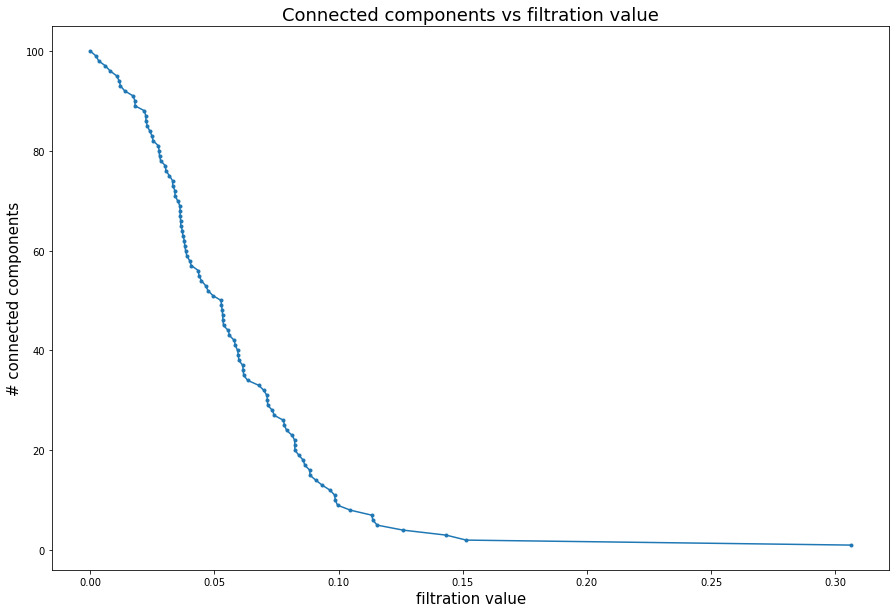

In [15]:
####################################
# Example where we use the previous function to generate the Dx matrix from the Cx matrix       #
####################################

########
#Code to create a big object with all the Cx matices 
txt_files_cx = glob.glob('Cx_matrix_var01/cx*.txt') #opening the Cx of the 10 types which are in the folder "Cx_matrix_var01"
print(txt_files_cx)
Cx_list = [] #Object that will contain all the Cx matrices

for i in range(0,len(txt_files_cx)): #Reading the data in the files and create an object which contains every matrix
    file_i= txt_files_cx[i]
    Cx_list.append(np.array(np.loadtxt(file_i)))   #Add the matrix of a file to the object Cx_list

Cx=np.array(Cx_list)  #Converting the list with all the matrix in a big numpy array
########


#######
#Calling the function one time for the first Cx matrix
dx,a,conn=from_cx_to_dx(Cx[0])
print(dx)
#Visualisation of the BETTi-0 curve
fig=plt.figure(figsize=(15, 10))
plt.plot(a,conn, marker='.') # I plot the two arrays         
plt.title("Connected components vs filtration value",fontsize=18)
plt.xlabel("filtration value",fontsize=15)
plt.ylabel("# connected components",fontsize=15)
#######


#########
#Calling the function several times
########
#IMPORTANT: TO RUN THIS you need to create an empty folder "Dx_matrix_var01"
# if you also want the Betti curves you need to create an empty folder "Beta_var01"

#Code to create the Dx matrices from the Cx matrices and the lists of filtration values and connected components for each matrix
for k in range(0,len(Cx)):

    dx,a,conn=from_cx_to_dx(Cx[k]) # I call the function to create the dx matrix from the cx matrix
    #print(a)
    #print(conn)
    print("Matrix dx %d created"%k)
      
    g=txt_files_cx[k] # g is the file cx
    g=g.replace('Cx_matrix_var01\\cx','Dx_matrix_var01\\dx')  #I replace the name cx with dx in the file name (and I change folder) 
    #N.B Depending on the operating system the name of the file could be \\ or / check which one you should use (you see it when you printed txt_files_cx).
    f=open(g,'w+') #I open the file in the new folder and I save the dx matrix
    
    for i in range(0,len(dx)):
        for j in range(0,len(dx)):
            f.write('%f ' %dx[i][j]) # I write the matrix dx on the file
        f.write('\n')
    f.close()
    
    # I can comment this part if I don't want to create the barcode
    #TO SAVE BETTI
    l=txt_files_cx[k]
    l=l.replace('cx','betti')
    l=l.replace('Cx_matrix_var01\\','Beta_var01\\')
    f=open(l,'w+')
    for i in range(len(a)): 
        f.write('%f %f' %(a[i],conn[i])) # I write in the file the two lists 
        f.write('\n')
    f.close()

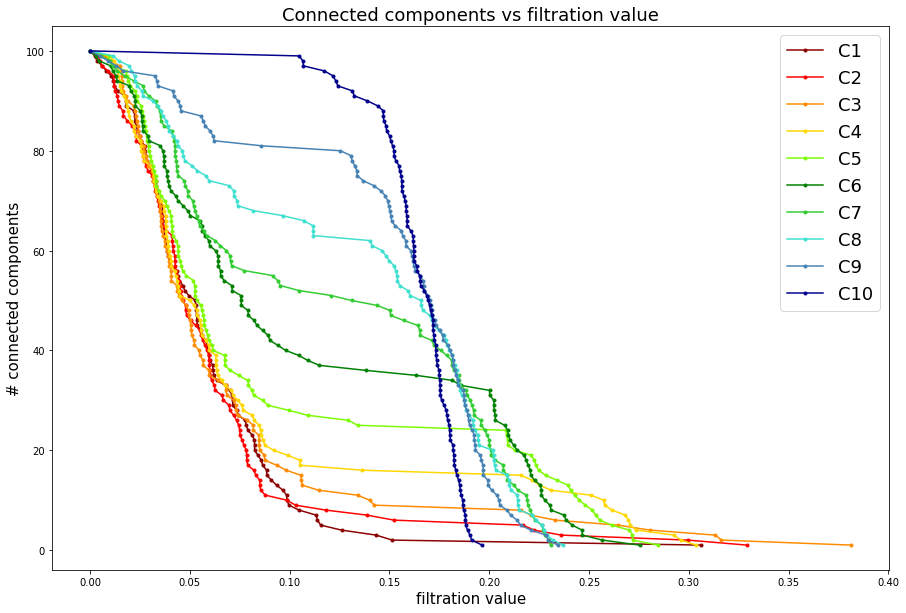

In [17]:
####################
# Visualisation of the Betti-0 curves#
####################


#Code to visualize the Barcode: merging of connencting components with the increment of the filtration value
import matplotlib.patches as mpatches
fig=plt.figure(figsize=(15, 10)) # I create the figure
filtr_value=[] # list which contain all the lists of filtration values
betti_n=[] #list which contain all the lists of connected components

filtr_value2=[]
betti_n2=[]
labels=['C%i'%(i+1) for i in range(0,10)]
colors=['darkred','red', 'darkorange','gold', 'lawngreen','green', 'limegreen','turquoise','steelblue','darkblue'] #colors
for i in range(0,10): #For all the 10 files of beta_zero I have (If I have N patients the loop will be in the range(0,N) )
        
        betti_data  = pd.read_csv('Beta_var01/betti_i=%s_n=000.txt'%str(i+1).zfill(3), delim_whitespace=True, names= 'x''y') #I upload the data where I have a list for the onnected components and the correspondant filtration values
        filtr_value.append(np.array(betti_data['x'])) # Create an array containing the values of x in the file and append it to filt_value list
        betti_n.append(np.array(betti_data['y'])) # Create an array containing the values of y in the file and append it to betti_n list
        plt.plot(filtr_value[i],betti_n[i], marker='.',label=labels[i], c=colors[i]) # I plot the two arrays 

        
        plt.title("Connected components vs filtration value",fontsize=18)
        plt.xlabel("filtration value",fontsize=15)
        plt.ylabel("# connected components",fontsize=15)
        plt.legend(fontsize=18)
        
#fig.savefig('Beta_var01/Betti_exp2.png') #Save figure
plt.show()

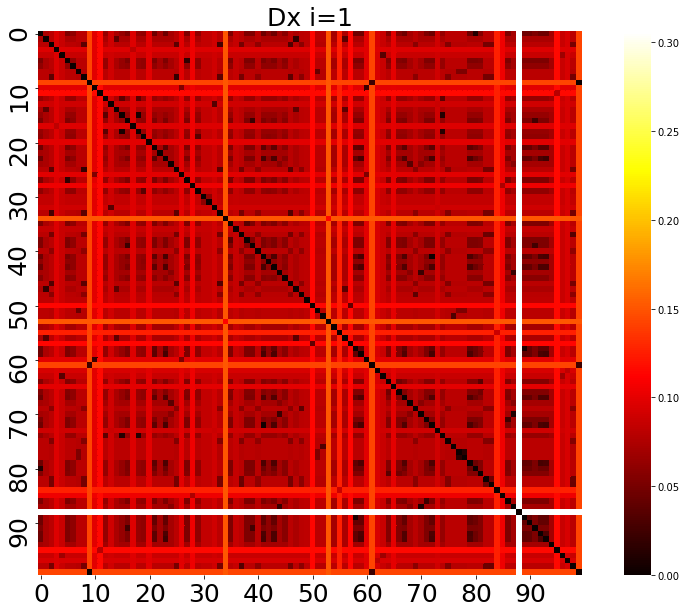

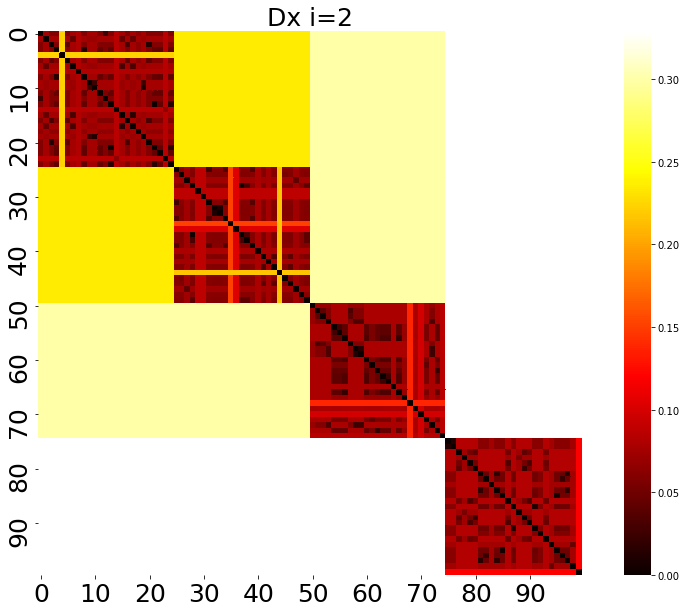

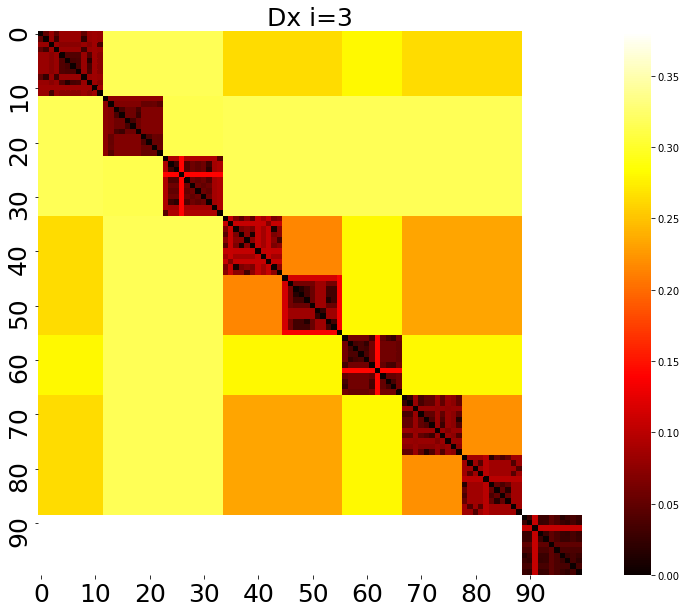

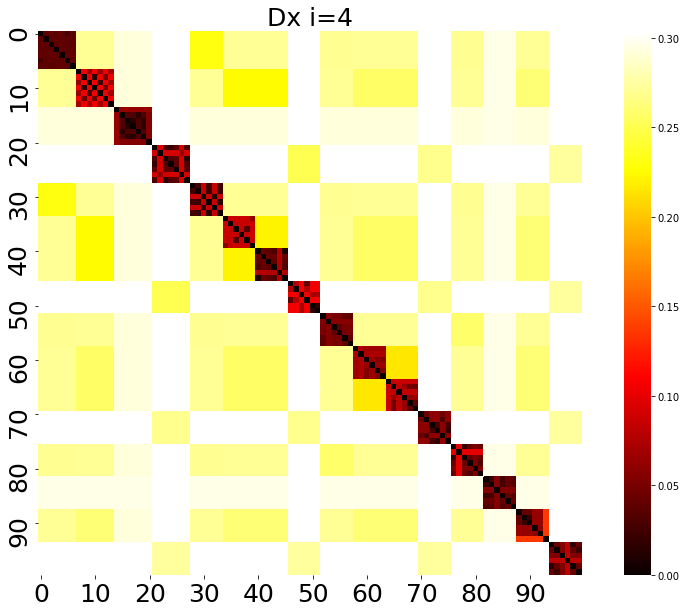

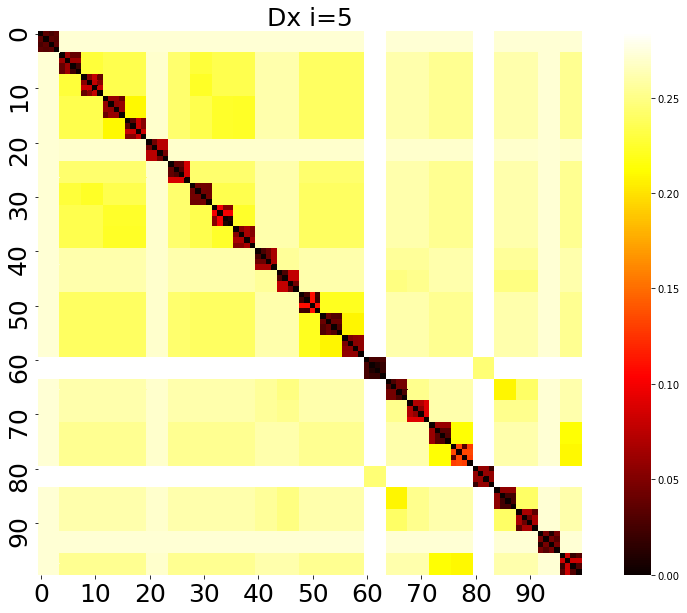

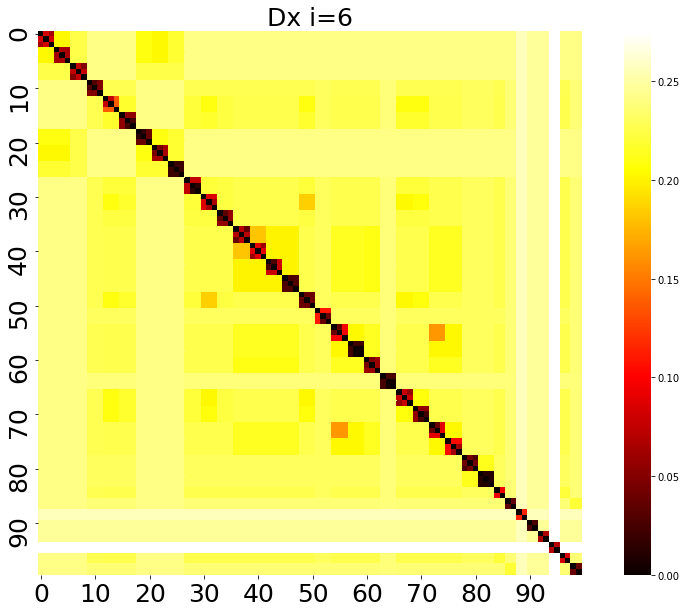

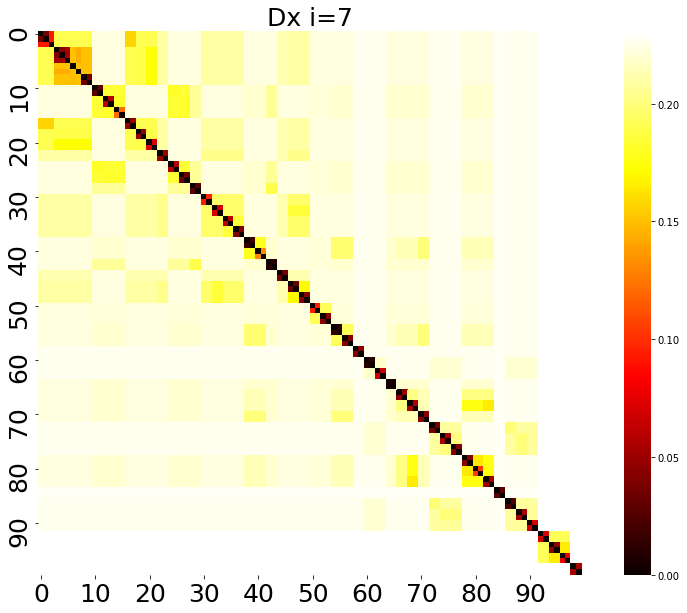

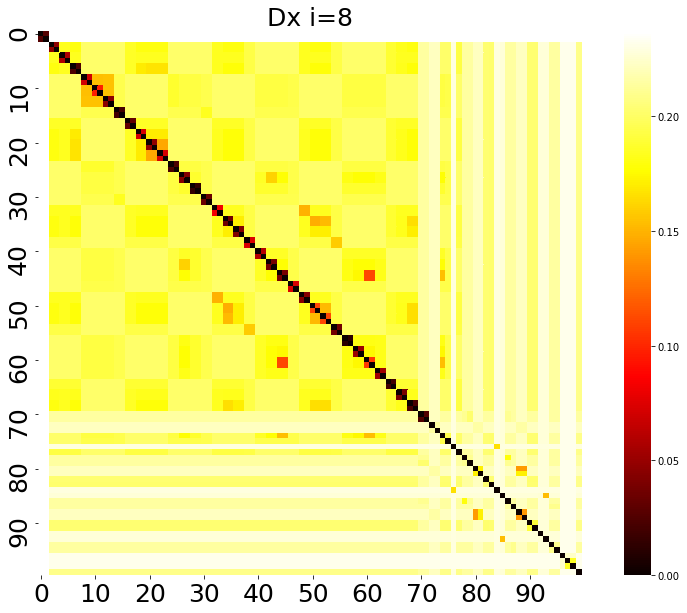

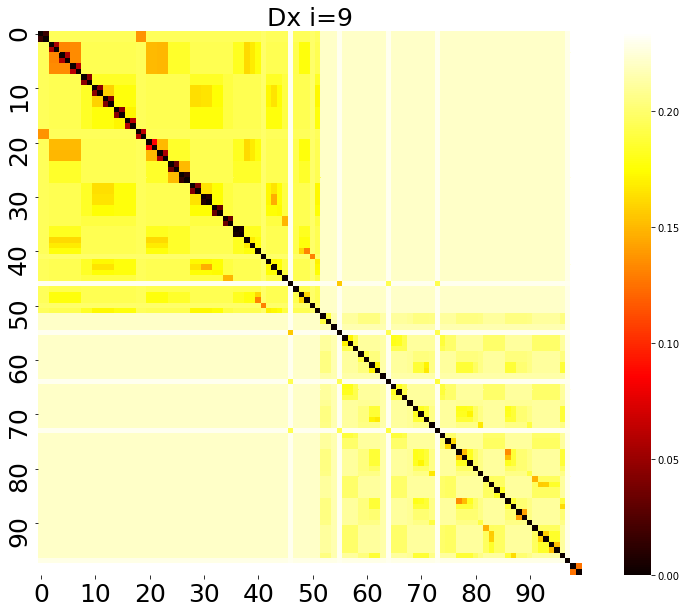

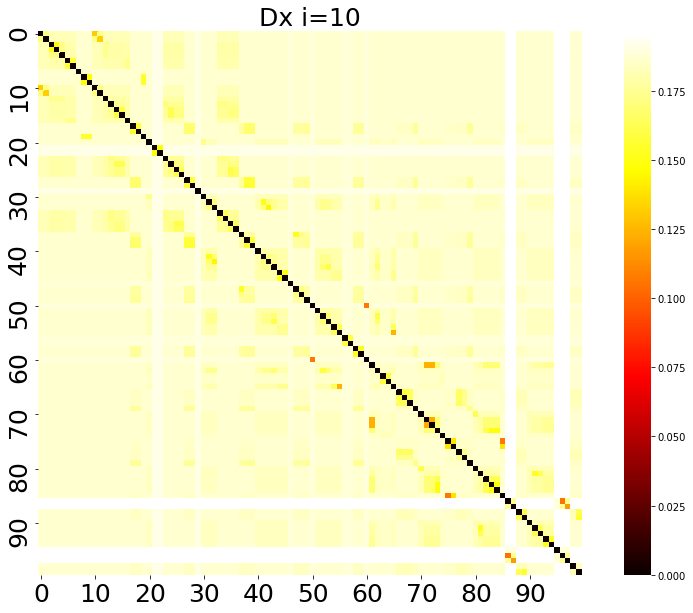

In [18]:
#Plot all the Dx matrix for the different configuration of points (just for the first experiment of each n=000)
for i in range(0,10):
    dx=np.array(np.loadtxt('Dx_matrix_var01/dx_i=%s_n=000.txt'%(str(i+1).zfill(3))) ) #load the file dx in an array
    
    fig = plt.figure(figsize=(15, 10)) #create the figure
    Dx_plot = sns.heatmap(dx,square=True,cmap='hot',xticklabels=10,yticklabels=10) #plot the figure using heatmap
    Dx_plot.set(xlim=(0,100),ylim=(100,0)) #set the x and y range
    plt.title('Dx i=%s'%(str(i+1)),fontsize=25) #set the title
    plt.tick_params(axis='both', labelsize=25)
    #fig.savefig('Dx_figures_var01/Dx i=%s.png'%(str(i+1))) #save the figure in the folder 